In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aircraft-accidents-failures-hijacks-dataset/Aircraft_Incident_Dataset.csv


In [2]:
dataset = pd.read_csv('/kaggle/input/aircraft-accidents-failures-hijacks-dataset/Aircraft_Incident_Dataset.csv')
dataset.head()

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Onboard_Crew,Onboard_Passengers,Onboard_Total,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Ground_Casualties,Collision_Casualties
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,...,Fatalities: 0 / Occupants: 3,Fatalities: 0 / Occupants: 4,Fatalities: 0 / Occupants: 7,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",NaN,NaN
1,04-JAN-2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 19,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roatán-Juan Manuel Gálvez International Airpor...,NaN,NaN
2,05-JAN-2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 116,0,1992-09-18 (29 years 4 months),Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",NaN,NaN
3,08-JAN-2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,...,Fatalities: 0 / Occupants: 8,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 8,0,2002-07-18 (19 years 6 months),Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",NaN,NaN
4,12-JAN-2022,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,...,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),?,?,NaN,NaN


In [3]:
dataset.shape

(23519, 23)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23519 entries, 0 to 23518
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Incident_Date         23519 non-null  object
 1   Aircaft_Model         23519 non-null  object
 2   Aircaft_Registration  21958 non-null  object
 3   Aircaft_Operator      23519 non-null  object
 4   Aircaft_Nature        23519 non-null  object
 5   Incident_Category     23519 non-null  object
 6   Incident_Cause(es)    23519 non-null  object
 7   Incident_Location     22587 non-null  object
 8   Aircaft_Damage_Type   23519 non-null  object
 9   Date                  23519 non-null  object
 10  Time                  9203 non-null   object
 11  Arit                  23519 non-null  object
 12  Aircaft_Engines       10636 non-null  object
 13  Onboard_Crew          23519 non-null  object
 14  Onboard_Passengers    23519 non-null  object
 15  Onboard_Total         23519 non-null

In [5]:
dataset.describe()

,Fatalities
count,23519.000000
mean,5.611931
std,22.205937
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,1692.000000


<AxesSubplot:>

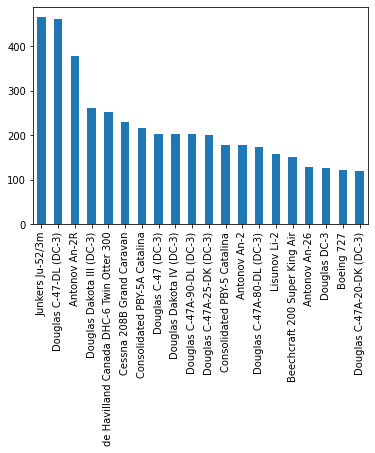

In [6]:
dataset['Aircaft_Model'].value_counts()[:20].plot(kind="bar")

<AxesSubplot:>

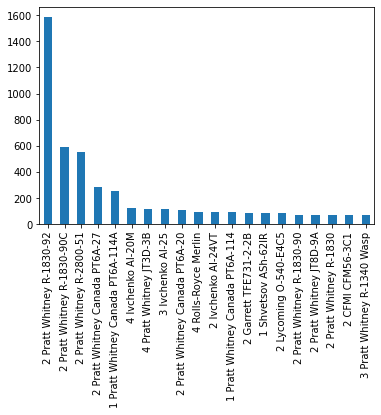

In [7]:
dataset['Aircaft_Engines'].value_counts()[:20].plot(kind="bar")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

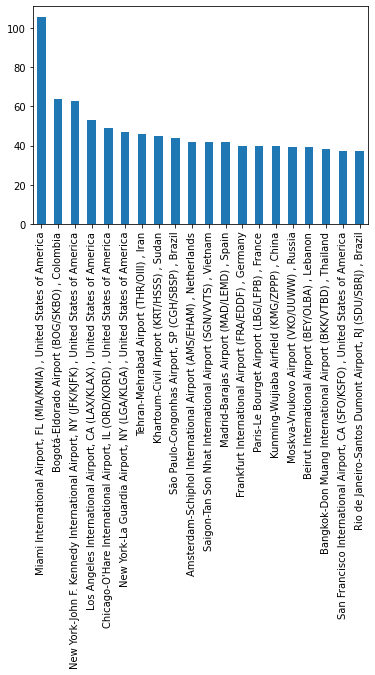

In [8]:
dataset[dataset.Departure_Airport != '?'][dataset.Departure_Airport != '-']['Departure_Airport'].value_counts()[:20].plot(kind="bar")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

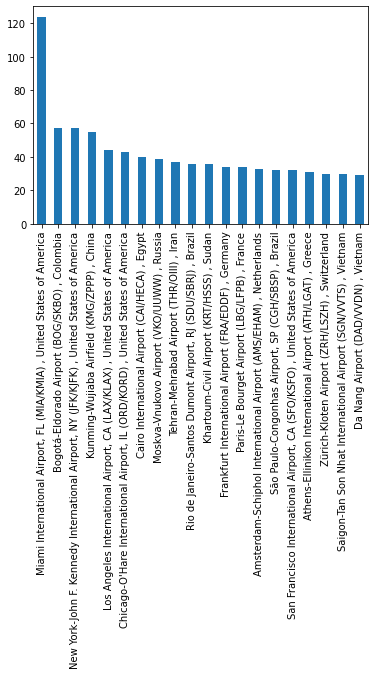

In [9]:
dataset[dataset.Destination_Airport != '?'][dataset.Destination_Airport != '-']['Destination_Airport'].value_counts()[:20].plot(kind="bar")

<AxesSubplot:>

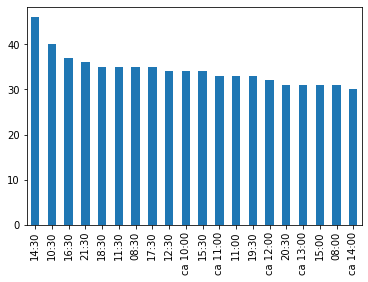

In [10]:
dataset['Time'].value_counts()[:20].plot(kind="bar")

<AxesSubplot:xlabel='Incident_Date'>

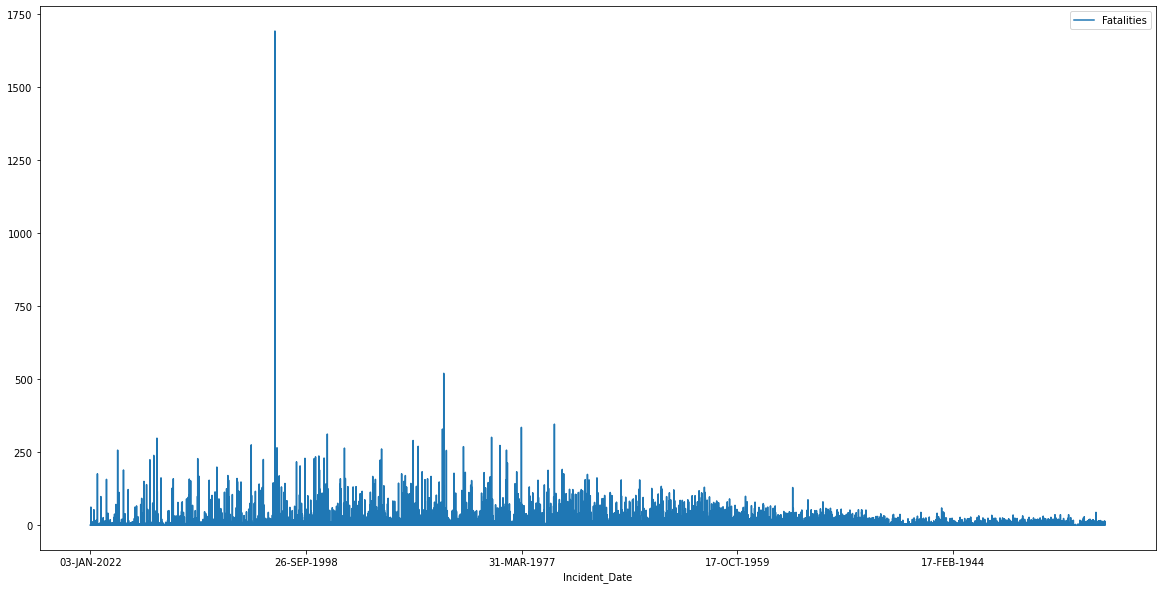

In [11]:
dataset.plot('Incident_Date','Fatalities',figsize=(20, 10))

<AxesSubplot:ylabel='Aircaft_Operator'>

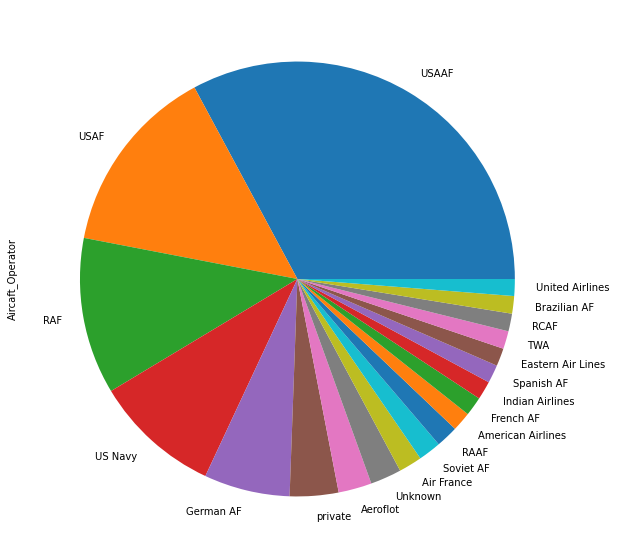

In [12]:
dataset['Aircaft_Operator'].value_counts()[:20].plot(kind="pie", figsize=(20, 10))

<AxesSubplot:>

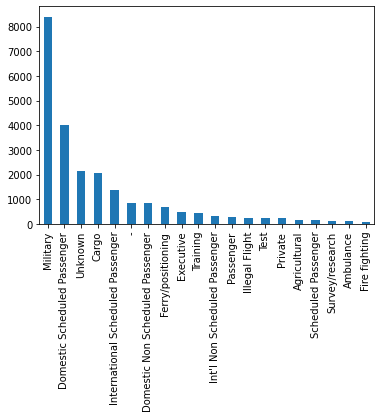

In [13]:
dataset['Aircaft_Nature'].value_counts()[:20].plot(kind="bar")

<AxesSubplot:>

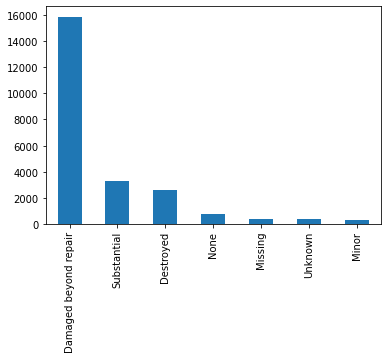

In [14]:
dataset['Aircaft_Damage_Type'].value_counts()[:20].plot(kind="bar")

In [15]:
dataset.isnull().sum()

Incident_Date               0
Aircaft_Model               0
Aircaft_Registration     1561
Aircaft_Operator            0
Aircaft_Nature              0
Incident_Category           0
Incident_Cause(es)          0
Incident_Location         932
Aircaft_Damage_Type         0
Date                        0
Time                    14316
Arit                        0
Aircaft_Engines         12883
Onboard_Crew                0
Onboard_Passengers          0
Onboard_Total               0
Fatalities                  0
Aircaft_First_Flight     5488
Aircraft_Phase              0
Departure_Airport           0
Destination_Airport         0
Ground_Casualties       23172
Collision_Casualties    23227
dtype: int64

In [16]:
dataset[dataset.Aircaft_Registration.isnull()]

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Onboard_Crew,Onboard_Passengers,Onboard_Total,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Ground_Casualties,Collision_Casualties
4,12-JAN-2022,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,...,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),?,?,NaN,NaN
16,12-JAN-2021,Harbin Y-12-II,NaN,Kenyan AF,Military,Accident | hull-loss,Info-Unavailable,near Voi,Damaged beyond repair,Tuesday 12 January 2021,...,Fatalities: 2 / Occupants: 2,Fatalities: 2 / Occupants: 2,Fatalities: 4 / Occupants: 4,4,NaN,Unknown (UNK),"Nairobi-Moi Air Base (HKRE) , Kenya","Mombasa-Moi International Airport (MBA/HKMO) ,...",NaN,NaN
24,29-JAN-2021,Beechcraft 100 King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Info-Unavailable,Crooked Tree...,Destroyed,Friday 29 January 2021,...,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),?,?,NaN,NaN
25,??-JAN-2021,Antonov An-2,NaN,KPAAF,Military,Accident | hull-loss,Result - Loss of control,near Taechon Air ...,Damaged beyond repair,xx JAN 2021,...,Fatalities: 5 / Occupants: 5,Fatalities: 0 / Occupants: 0,Fatalities: 5 / Occupants: 5,5,NaN,Initial climb (ICL),"Taechon Air Base , North Korea","Taechon Air Base , North Korea",NaN,NaN
37,21-FEB-2021,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Info-Unavailable,"San Andrés, ...",Destroyed,Sunday 21 February 2021,...,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),?,?,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23502,??-???-1923,Aeromarine 75,NaN,Aeromarine Airways,-,"other occurrence (ground fire, sabotage) | hul...",Result - Damaged on the ground,Havana harbour,Damaged beyond repair,xx xxx 1923,...,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),-,-,NaN,NaN
23504,31-MAR-1922,Handley Page O/7,NaN,Chinese Government,Domestic Non Scheduled Passenger,Accident | hull-loss,Info-Unavailable,near Beijing-Nany...,Damaged beyond repair,Friday 31 March 1922,...,Fatalities: / Occupants:,Fatalities: / Occupants:,Fatalities: 14 / Occupants: 14,14,NaN,Approach (APR),?,"Beijing-Nanyuan Airport (NAY/ZBNY) , China",NaN,NaN
23506,15-JAN-1921,Aeromarine 75,NaN,Aeromarine Airways,-,"other occurrence (ground fire, sabotage) | hul...",Result - Damaged on the ground,Havana harbour,Damaged beyond repair,Saturday 15 January 1921,...,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),-,-,NaN,NaN
23508,04-MAR-1921,Caproni Ca.60 Noviplano,NaN,Caproni,Test,Accident | hull-loss,Info-Unavailable,Lago Maggiore,Damaged beyond repair,Friday 4 March 1921,...,Fatalities: 0 / Occupants: 1,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 1,0,1921-03-04 (),Initial climb (ICL),?,?,NaN,NaN


In [17]:
dropped_dataset = dataset.drop (columns=['Ground_Casualties', 'Collision_Casualties'])

In [18]:
dropped_dataset.columns.tolist()

['Incident_Date',
 'Aircaft_Model',
 'Aircaft_Registration',
 'Aircaft_Operator',
 'Aircaft_Nature',
 'Incident_Category',
 'Incident_Cause(es)',
 'Incident_Location',
 'Aircaft_Damage_Type',
 'Date',
 'Time',
 'Arit',
 'Aircaft_Engines',
 'Onboard_Crew',
 'Onboard_Passengers',
 'Onboard_Total',
 'Fatalities',
 'Aircaft_First_Flight',
 'Aircraft_Phase',
 'Departure_Airport',
 'Destination_Airport']

In [19]:
dropped_dataset['Incident_Day'] = dropped_dataset['Incident_Date'].str[:2]
dropped_dataset['Inciddnt_Year'] = dropped_dataset['Incident_Date'].str[-4:]
dropped_dataset['Incident_Month'] = dropped_dataset['Incident_Date'].str[3:6]
print(dropped_dataset.columns.tolist())
dropped_dataset.head()

['Incident_Date', 'Aircaft_Model', 'Aircaft_Registration', 'Aircaft_Operator', 'Aircaft_Nature', 'Incident_Category', 'Incident_Cause(es)', 'Incident_Location', 'Aircaft_Damage_Type', 'Date', 'Time', 'Arit', 'Aircaft_Engines', 'Onboard_Crew', 'Onboard_Passengers', 'Onboard_Total', 'Fatalities', 'Aircaft_First_Flight', 'Aircraft_Phase', 'Departure_Airport', 'Destination_Airport', 'Incident_Day', 'Inciddnt_Year', 'Incident_Month']


,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Onboard_Passengers,Onboard_Total,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Incident_Day,Inciddnt_Year,Incident_Month
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,...,Fatalities: 0 / Occupants: 4,Fatalities: 0 / Occupants: 7,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",03,2022,JAN
1,04-JAN-2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 19,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roatán-Juan Manuel Gálvez International Airpor...,04,2022,JAN
2,05-JAN-2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 116,0,1992-09-18 (29 years 4 months),Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",05,2022,JAN
3,08-JAN-2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,...,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 8,0,2002-07-18 (19 years 6 months),Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",08,2022,JAN
4,12-JAN-2022,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,...,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),?,?,12,2022,JAN


In [20]:
dataset.Date.value_counts()

Friday 10 May 1940          170
Saturday 24 March 1945       50
Tuesday 6 June 1944          41
Sunday 17 September 1944     35
Monday 18 September 1944     29
                           ... 
Thursday 12 June 1986         1
Tuesday 17 June 1986          1
Wednesday 18 June 1986        1
Thursday 19 June 1986         1
Monday 11 August 1919         1
Name: Date, Length: 14853, dtype: int64

In [21]:
print(dropped_dataset['Incident_Category'].unique())
dropped_dataset[['Incident_Type', 'Incident_Damage_State']] = dropped_dataset['Incident_Category'].str.split("|", expand=True)
dropped_dataset.head(7)

['Accident | repairable-damage' 'Accident | hull-loss'
 'Criminal occurrence (sabotage, shoot down) | hull-loss'
 'other occurrence (ground fire, sabotage) | hull-loss'
 'Criminal occurrence (sabotage, shoot down) | repairable-damage'
 'Hijacking | repairable-damage'
 'other occurrence (ground fire, sabotage) | repairable-damage'
 'occurrence unknown | hull-loss' 'Incident | repairable-damage'
 'Hijacking | hull-loss']


,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Incident_Day,Inciddnt_Year,Incident_Month,Incident_Type,Incident_Damage_State
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,...,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",03,2022,JAN,Accident,repairable-damage
1,04-JAN-2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,...,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roatán-Juan Manuel Gálvez International Airpor...,04,2022,JAN,Accident,repairable-damage
2,05-JAN-2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,...,0,1992-09-18 (29 years 4 months),Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",05,2022,JAN,Accident,repairable-damage
3,08-JAN-2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,...,0,2002-07-18 (19 years 6 months),Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",08,2022,JAN,Accident,hull-loss
4,12-JAN-2022,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,...,0,NaN,Standing (STD),?,?,12,2022,JAN,"Criminal occurrence (sabotage, shoot down)",hull-loss
5,22-JAN-2022,Airbus A320-232,N760JB,JetBlue Airways,Domestic Scheduled Passenger,Accident | repairable-damage,"Landing/takeoff - Tailstrike, Result - Runway ...",Hayden-Yampa...,Substantial,Saturday 22 January 2022,...,0,2008-10-07 (13 years 4 months),Takeoff (TOF),"Hayden-Yampa Valley Airport, CO (HDN/KHDN) , U...","Fort Lauderdale International Airport, FL (FLL...",22,2022,JAN,Accident,repairable-damage
6,31-JAN-2022,Beechcraft B300 King Air 350,C-GEAS,"Air Tindi, opf RCAF",Military,Accident | repairable-damage,Result - Runway excursion,Thunder Bay ...,Substantial,Monday 31 January 2022,...,0,1990,Landing (LDG),"Trenton Canadian Forces Base, ON (YTR/CYTR) , ...","Thunder Bay Airport, ON (YQT/CYQT) , Canada",31,2022,JAN,Accident,repairable-damage


In [22]:
dropped_dataset['Incident_Cause(es)'].unique()

array(['Airplane - Engines, Airplane - Engines - Prop/turbine blade separation, Collision - Object, Collision - Object - Bird, Result - Emergency, forced landing - On runway',
       'Airplane - Undercarriage, Airplane - Undercarriage - Landing gear collapse, Result - Runway mishap',
       'Cargo - Fire/smoke, Result - Damaged on the ground', ...,
       'Fire - Inflight, Result - Loss of control, Unknown - Cause undetermined',
       'Airplane - Undercarriage, Airplane - Undercarriage - Gear-up landing, ATC & navigation - VFR flight in IMC, Result - Emergency, forced landing - Outside airport',
       'Airplane - Flight control surfaces, Airplane - Flight control surfaces - Rudder, Result - Emergency, forced landing - Outside airport'],
      dtype=object)

In [23]:
dropped_dataset.isnull().sum()

Incident_Date                0
Aircaft_Model                0
Aircaft_Registration      1561
Aircaft_Operator             0
Aircaft_Nature               0
Incident_Category            0
Incident_Cause(es)           0
Incident_Location          932
Aircaft_Damage_Type          0
Date                         0
Time                     14316
Arit                         0
Aircaft_Engines          12883
Onboard_Crew                 0
Onboard_Passengers           0
Onboard_Total                0
Fatalities                   0
Aircaft_First_Flight      5488
Aircraft_Phase               0
Departure_Airport            0
Destination_Airport          0
Incident_Day                 0
Inciddnt_Year                0
Incident_Month               0
Incident_Type                0
Incident_Damage_State        0
dtype: int64

In [24]:
non_fatal_accidents = (dropped_dataset[dropped_dataset['Fatalities'] == 0])

In [25]:
non_fatal_accidents.head(5)

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Incident_Day,Inciddnt_Year,Incident_Month,Incident_Type,Incident_Damage_State
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,...,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",03,2022,JAN,Accident,repairable-damage
1,04-JAN-2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,...,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roatán-Juan Manuel Gálvez International Airpor...,04,2022,JAN,Accident,repairable-damage
2,05-JAN-2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,...,0,1992-09-18 (29 years 4 months),Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",05,2022,JAN,Accident,repairable-damage
3,08-JAN-2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,...,0,2002-07-18 (19 years 6 months),Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",08,2022,JAN,Accident,hull-loss
4,12-JAN-2022,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,...,0,NaN,Standing (STD),?,?,12,2022,JAN,"Criminal occurrence (sabotage, shoot down)",hull-loss


In [26]:
fatal_accidents = (dropped_dataset[dropped_dataset['Fatalities'] > 0])
fatal_accidents.head()

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Incident_Day,Inciddnt_Year,Incident_Month,Incident_Type,Incident_Damage_State
9,11-FEB-2022,Antonov An-2R,RA-33599,Kamchatsky Krechet,Cargo,Accident | hull-loss,Info-Unavailable,"near Koryaki, Yel...",Destroyed,Friday 11 February 2022,...,2,1988,Initial climb (ICL),?,?,11,2022,FEB,Accident,hull-loss
14,09-JAN-2021,Boeing 737-524 (WL),PK-CLC,Sriwijaya Air,Domestic Scheduled Passenger,Accident | hull-loss,Result - Loss of control,near Jakarta-Soek...,Destroyed,Saturday 9 January 2021,...,62,1994-05-13 (26 years 8 months),En route (ENR),Jakarta-Soekarno-Hatta International Airport (...,"Pontianak Airport (PNK/WIOO) , Indonesia",09,2021,JAN,Accident,hull-loss
15,09-JAN-2021,Cessna 560 Citation V,N3RB,SX Transport LLC,Unknown,Accident | hull-loss,"Result - Loss of control, Result - Loss of con...","near Pine Grove, OR",Destroyed,Saturday 9 January 2021,...,1,1989,En route (ENR),"Troutdale Airport, OR (TTD/KTTD) , United Stat...","Boise Air Terminal, ID (BOI/KBOI) , United Sta...",09,2021,JAN,Accident,hull-loss
16,12-JAN-2021,Harbin Y-12-II,NaN,Kenyan AF,Military,Accident | hull-loss,Info-Unavailable,near Voi,Damaged beyond repair,Tuesday 12 January 2021,...,4,NaN,Unknown (UNK),"Nairobi-Moi Air Base (HKRE) , Kenya","Mombasa-Moi International Airport (MBA/HKMO) ,...",12,2021,JAN,Accident,hull-loss
25,??-JAN-2021,Antonov An-2,NaN,KPAAF,Military,Accident | hull-loss,Result - Loss of control,near Taechon Air ...,Damaged beyond repair,xx JAN 2021,...,5,NaN,Initial climb (ICL),"Taechon Air Base , North Korea","Taechon Air Base , North Korea",??,2021,JAN,Accident,hull-loss


In [27]:
non_fatal_accidents.isnull().sum()

Incident_Date               0
Aircaft_Model               0
Aircaft_Registration     1118
Aircaft_Operator            0
Aircaft_Nature              0
Incident_Category           0
Incident_Cause(es)          0
Incident_Location         878
Aircaft_Damage_Type         0
Date                        0
Time                     9834
Arit                        0
Aircaft_Engines          7954
Onboard_Crew                0
Onboard_Passengers          0
Onboard_Total               0
Fatalities                  0
Aircaft_First_Flight     3340
Aircraft_Phase              0
Departure_Airport           0
Destination_Airport         0
Incident_Day                0
Inciddnt_Year               0
Incident_Month              0
Incident_Type               0
Incident_Damage_State       0
dtype: int64